<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 1 - PRE-PROCESSING 📌
</div>

## **IMPORT LIBRARY** 🎄

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## **THÔNG TIN CHUNG VỀ DỮ LIỆU** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. Đọc 10 dòng dữ liệu đầu 🔥
</div>

In [2]:
df = pd.read_csv('../../Data/2425_QC.csv')
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,19/5/2016 14:30,0
6,88.91,33.0,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,28/1/2016 20:59,0
7,66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,7/3/2016 1:40,1
8,74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,18/4/2016 9:33,0
9,69.88,20.0,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,11/7/2016 1:42,0


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. Nhận xét về thống kê và thông tin cơ bản của dữ liệu 🔥
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1002 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1002 non-null   float64
 3   Daily Internet Usage      1002 non-null   float64
 4   Ad Topic Line             1002 non-null   object 
 5   City                      1002 non-null   object 
 6   Male                      1002 non-null   int64  
 7   Country                   1002 non-null   object 
 8   Timestamp                 1002 non-null   object 
 9   Clicked on Ad             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.4+ KB


📈`NHẬN XÉT:`
- Tổng quan về dữ liệu: DataFrame có 1002 dòng, 10 cột, với sự kết hợp của các kiểu dữ liệu: float64, int64 và object.
- dtypes: float64(4), int64(2), object(4)
- Tất cả các cột, ngoại trừ `Age`, chứa 1002 giá trị khác null, nghĩa là chỉ thiếu 1 giá trị cho cột `Age`, do đó việc xử lý dữ liệu bị thiếu sẽ không phải là vấn đề lớn.
Các cột như `City`, `Country` và `Ad Topic Line` có thể sẽ cần tiền xử lý dữ liệu, chẳng hạn như encoding, để làm cho chúng phù hợp cho việc phân tích hoặc xây dựng mô hình dự đoán.

**1. Dữ liệu số:**
- Daily Time Spent on Site
- Age
- Area Income
- Daily Internet Usage

**2. Dữ liệu phân loại:**
- Ad Topic Line
- City
- Country
- Timestamp
- Male (binary categorical feature)

**3. Dữ liệu mục tiêu:**
- Clicked on Ad (giá trị 0 hoặc 1)

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. Ý nghĩa của các cột dữ liệu trong bộ dữ liệu 🧮
</div>

<table style="width: 100%; border-collapse: collapse;font-family: 'Trebuchet MS', Arial, sans-serif;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Tên cột</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">Daily Time Spent on Site</td>
      <td style="font-size: 17px; text-align: left;">Số phút trung bình khách hàng ghé qua site mỗi ngày.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">Age</td>
      <td style="font-size: 17px; text-align: left;">Tuổi của khách hàng.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">Area Income</td>
      <td style="font-size: 17px; text-align: left;">Thu nhập bình quân theo khu vực địa lý của khách hàng.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">Daily Internet Usage</td>
      <td style="font-size: 17px; text-align: left;">Số phút trung bình mỗi ngày khách hàng truy cập Internet.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">Ad Topic Line</td>
      <td style="font-size: 17px; text-align: left;">Tiêu đề của quảng cáo.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">City</td>
      <td style="font-size: 17px; text-align: left;">Thành phố sinh sống của khách hàng.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">Male</td>
      <td style="font-size: 17px; text-align: left;">1 nếu khách hàng là nam và 0 nếu là nữ.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">Country</td>
      <td style="font-size: 17px; text-align: left;">Quốc gia của khách hàng.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">Timestamp</td>
      <td style="font-size: 17px; text-align: left;">Thời điểm khách hàng nhấp vào Quảng cáo hoặc đóng cửa sổ window.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">10</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">Clicked on Ad</td>
      <td style="font-size: 17px; text-align: left;">1 nếu khách hàng có nhấp vào quảng cáo và 0 nếu ngược lại.</td>
    </tr>
  </tbody>
</table>

## **GIAI ĐOẠN TIỀN XỬ LÝ DỮ LIỆU** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. Dữ liệu có bao nhiêu hàng và bao nhiêu cột? 🧮
</div>

In [4]:
shape = df.shape
print(f"Shape của dữ liệu: {shape}")

Shape của dữ liệu: (1002, 10)


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. Mỗi dòng có ý nghĩa gì? Có vấn đề gì nếu các dòng có ý nghĩa khác nhau không? 🧮
</div>

🔍🔍🔍 Hiểu được ý nghĩa từng dòng giúp chúng ta hiểu tổng thể hơn về dữ liệu.\
🔍🔍🔍 Dữ liệu của chúng ta đang nói về điều gì hoặc nếu một số dòng dữ liệu có ý nghĩa khác nhau sẽ dẫn đến dữ liệu không nhất quán và đưa ra những hiểu biết sai lệch.

📈`NHẬN XÉT:`
- Mỗi dòng thể hiện dữ liệu về tương tác của một khách hàng với quảng cáo trực tuyến.
- Tập dữ liệu này thường được sử dụng để phân tích và dự đoán hành vi của người dùng, đặc biệt là những yếu tố nào ảnh hưởng đến khả năng nhấp vào quảng cáo của khách hàng.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
🧮🧮🧮  Trong dữ liệu của chúng ta, mỗi dòng chứa dữ liệu về tương tác của một khách hàng với quảng cáo trực tuyến.
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. Xử lý dữ liệu bị trùng lặp 🧮
</div>

🚨  Chúng ta cần kiểm tra các hàng trùng lặp vì các hàng trùng lặp không có nhiều ý nghĩa, thậm chí ảnh hưởng đến cái nhìn tổng thể về dữ liệu.\
🚨  Vì vậy, mỗi dòng nên khác nhau.\
🚨  Việc có các hàng trùng lặp có thể dẫn đến hiểu biết sai về các câu hỏi cần đếm.\
🚨  Trong phần này, chúng ta sẽ đi sâu vào việc kiểm tra các hàng trùng lặp. Nếu tồn tại các hàng trùng lặp thì bỏ nó đi.

In [5]:
# Count duplicate rows
num_duplicates = df.duplicated(keep='first').sum()
print(f'Number of duplicated rows: {num_duplicates}')

# Drop duplicates
df = df.drop_duplicates(keep='first')
df = df.reset_index(drop=True)
num_duplicates = df.duplicated(keep='first').sum()
print(f'Number of duplicated rows after dropping: {num_duplicates}')

print(f"Current shape: {df.shape}")

Number of duplicated rows: 2
Number of duplicated rows after dropping: 0
Current shape: (1000, 10)


📈`NHẬN XÉT:`
- Như chúng ta có thể thấy, có 2 dòng dữ liệu bị trùng lắp. Sau khi xoá 2 dòng đó đi, dữ liệu của chúng ta đã sẵn sàng cho các bước tiếp theo.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  4. Xử lý dữ liệu outliers 🧮
</div>

🚨  Outliers là các giá trị sai lệch đáng kể so với các quan sát khác trong tập dữ liệu.\
🚨  Outliers có thể làm sai lệch kết quả và dẫn đến kết luận sai lệch nếu không được xử lý đúng cách.\
🚨  Việc xác định outliers rất quan trọng để duy trì chất lượng dữ liệu và cải thiện độ chính xác của phân tích.\
🚨  Trong phần này, chúng ta sẽ kiểm tra outliers và xác định xem nên giữ, chuyển đổi hay loại bỏ chúng tùy thuộc vào tác động của chúng.

In [6]:
# describe the numerical features
num_features = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
df.describe()[num_features]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,999.000000,1000.000000,1000.000000
mean,65.000200,36.019019,55000.000080,180.000100
std,15.853615,8.784245,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


📈`NHẬN XÉT:`

- Các biến số của dữ liệu không bị sai lệch lắm vì giá trị trung bình và trung vị gần như giống nhau. Vì vậy, có thể chúng ta không cần biến đổi dữ liệu lắm. Và cũng vì thế, chúng ta sẽ xem xét sâu hơn từng thuộc tính.

- Có thể dự đoán được cột **Area Income** có khả năng cao tồn tại outliers khi mà giá trị nhỏ nhất của **Area Income** là 13996 trong khi giá trị trung bình của nó lại lên đến 55000. Biết rằng giá trị trung bình rất nhạy cảm với outliers, nên khi giá trị trung bỉnh quá lớn so với giá trị nhỏ nhất, có thể thấy đươc giá trị nhó nhất là outliers.

Bây giờ, chúng ta sẽ trực quan hoá dữ liệu bằng biểu đồ boxplot để kiểm tra các giá trị outlier.

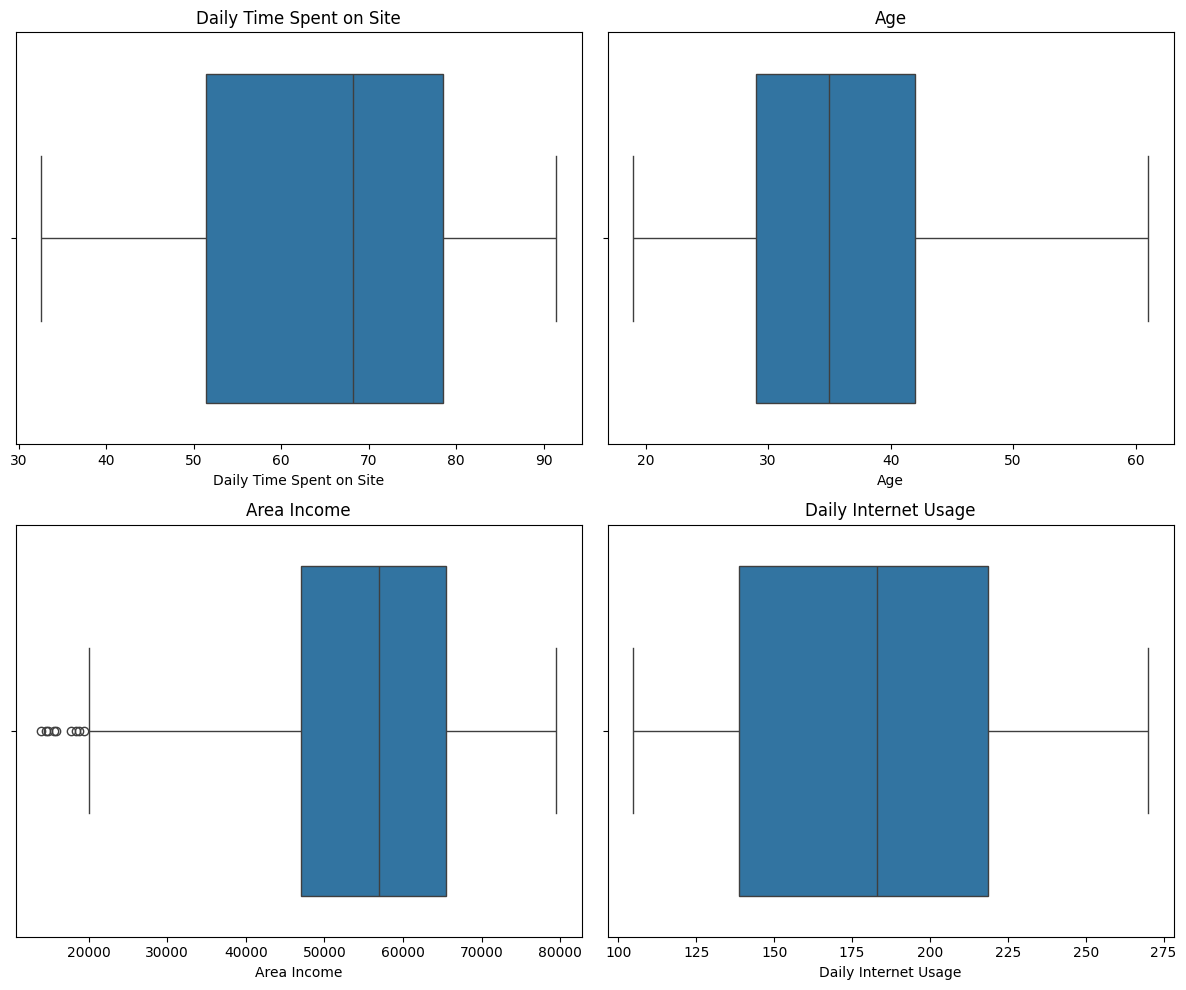

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# boxplot for each numerical feature
for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

📝 **Sử dụng phương pháp IQR**

Dùng phương pháp độ trải giữa, có thể xác định các outliers là các giá trị nhỏ hơn **(Q1 – 1.5 \* IQR)** hoặc lớn hơn **(Q3 + 1.5 \* IQR)**.

Trong đó Q1 là điểm mà 25% dữ liệu thấp hơn Q1 và 75% dữ liệu cao hơn Q1

Q3 là điểm mà 25% dữ liệu cao hơn Q3 và 75% dữ liệu thấp hơn Q3

IQR được tính bằng Q3 - Q1

Trong pandas có cung cấp hàm **quantile()** để tính toán các giá trị Q1 và Q3

In [8]:
# define the function to find the outliers using IQR method
def findOutlierUsingIQR(df:pd.DataFrame):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lowerLimit=q1-1.5*IQR
    upperLimit=q3+1.5*IQR
    
    outliers = df[(df<lowerLimit) | (df>upperLimit)]

    return outliers

In [9]:
# Find outliers using IQR method
outliers = findOutlierUsingIQR(df[num_features])

# Print the outliers
outliers=outliers[~outliers.isnull().all(axis=1)]
outliers

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
135,NaN,NaN,17709.98,NaN
410,NaN,NaN,19345.36,NaN
510,NaN,NaN,18819.34,NaN
640,NaN,NaN,15598.29,NaN
665,NaN,NaN,15879.10,NaN
692,NaN,NaN,14548.06,NaN
768,NaN,NaN,13996.50,NaN
778,NaN,NaN,14775.50,NaN
952,NaN,NaN,18368.57,NaN


📈`NHẬN XÉT:`
- Đúng như dự đoán ở trên, có 9 outliers được tìm thấy tại trường Area Income qua việc dùng IQR.

In [10]:
# Find the index of the outliers
idx=outliers[~outliers.isnull().all(axis=1)].index

# Check the outliers with the index
df.iloc[idx]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
135,49.89,39.0,17709.98,160.03,Enhanced system-worthy application,East Michele,1,Belize,16/4/2016 12:09,1
410,48.09,33.0,19345.36,180.42,Balanced motivating help-desk,West Travismouth,0,Heard Island and McDonald Islands,28/5/2016 12:38,1
510,57.86,30.0,18819.34,166.86,Horizontal modular success,Estesfurt,0,Algeria,8/7/2016 17:14,1
640,64.63,45.0,15598.29,158.80,Triple-buffered high-level Internet solution,Isaacborough,1,Azerbaijan,12/6/2016 3:11,1
665,58.05,32.0,15879.10,195.54,Total asynchronous architecture,Sanderstown,1,Tajikistan,12/2/2016 10:39,1
692,66.26,47.0,14548.06,179.04,Optional full-range projection,Matthewtown,1,Lebanon,25/4/2016 19:31,1
768,68.58,41.0,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,6/7/2016 12:04,1
778,52.67,44.0,14775.50,191.26,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,19/5/2016 6:37,1
952,62.79,36.0,18368.57,231.87,Total coherent archive,New James,1,Luxembourg,30/5/2016 20:08,1


📈`NHẬN XÉT:`
- Vì các giá trị outliers trong Area Income hợp lý nên không loại bỏ mà sẽ thay thế bằng các giá trị phù hợp hơn cho thống kê bằng cách đặt giá trị tối đa và tối thiểu.
- Giá trị tối đa được tính bằng công thức **Q3 + 1.5\*(Q3 - Q1)**.
- Giá trị tối thiểu được tính bằng công thức **Q1 - 1.5\*(Q3 - Q1)**.

In [11]:
df_IQR = df.copy()

#B1: Tìm khoảng Limit

# Cach 1:Dùng IQR
q1 = df_IQR['Area Income'].quantile(0.25)
q3 = df_IQR['Area Income'].quantile(0.75)
lower_limit = q1 - 1.5 * (q3 - q1)
upper_limit = q3 + 1.5 * (q3 - q1)
print(upper_limit)
print(lower_limit)

# Cach 2:Dùng mean()-3*std() và mean()+3*std()
# upper_limit = df['Area Income'].mean() + 3*df['Area Income'].std()
# print(upper_limit)
# lower_limit = df['Area Income'].mean() - 3*df['Area Income'].std()
# print(lower_limit)


# B2: Thay Outliers

# Cach 1: Thay giá trị outliers
df_IQR['Area Income'] = np.where(
    df_IQR['Area Income'] > upper_limit,
    upper_limit,
    np.where(df_IQR['Area Income'] < lower_limit, 
        lower_limit,
        df_IQR['Area Income'])
)

# Cach 2: Xóa outliers
#dfCopy=dfCopy.iloc[~idx]


#B3: Kiểm tra lại
df_IQR.describe()[num_features]

93128.88375
19373.553750000003


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,999.000000,1000.000000,1000.000000
mean,65.000200,36.019019,55025.321364,180.000100
std,15.853615,8.784245,13343.228619,43.902339
min,32.600000,19.000000,19373.553750,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


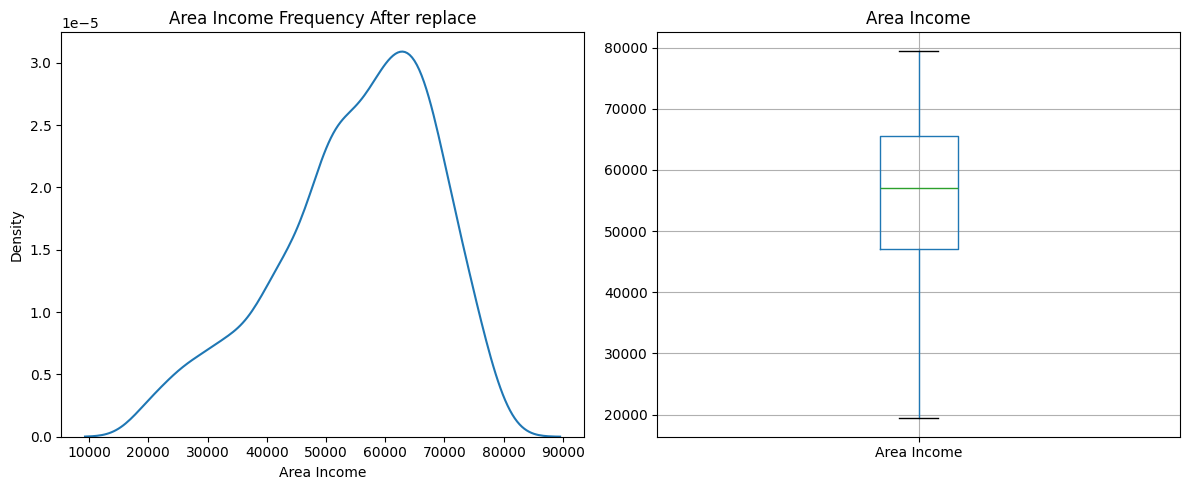

In [12]:
# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot on the first subplot
sns.kdeplot(data=df_IQR["Area Income"], ax=ax[0])
ax[0].set_title("Area Income Frequency After replace")

# Boxplot on the second subplot
pd.DataFrame(df_IQR['Area Income']).boxplot(ax=ax[1])
ax[1].set_title("Area Income")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

📈`KẾT LUẬN:`
- Phân phối không bị ảnh hưởng sau quá trình thay thế outliers, bên cạnh đó, tần suất điểm xuất hiện gần giá trị 20000 có tăng lên vì hầu hết các giá trị outliers đã bị thay bằng giá trị tối thiểu.

📝 **Sử dụng phương pháp Z-Score**

The Z-score is a statistical method used to determine how far a data point deviates from the mean of a dataset. It measures how many standard deviations a data point is from the mean.

A typical threshold for outliers using Z-scores is 3 (or -3). Any data point with a Z-score greater than 3 or less than -3 is considered an outlier.

We'll use zscore function from scipy to calculate the Z-score for a dataset

In [13]:
def detect_outlier_z_score(df:pd.DataFrame, threshold):
    z_scores_abs = abs(zscore(df))
    test = pd.DataFrame(z_scores_abs, columns=df.columns)
    flag = (test > threshold).any() # to determine that columns have outliers
    outlier_index = (test > threshold).any(axis=1)
    return outlier_index, flag


Generally, the boxplot diagram in the beginning indicates that Area Income column should be the only one with outliers.

In [14]:
invalid_index, flag = detect_outlier_z_score(df[num_features], 3)
print(df.loc[invalid_index, num_features], '\n')
print(flag) # to determine that columns have outliers

     Daily Time Spent on Site   Age  Area Income  Daily Internet Usage
692                     66.26  47.0     14548.06                179.04
768                     68.58  41.0     13996.50                171.54
778                     52.67  44.0     14775.50                191.26 

Daily Time Spent on Site    False
Age                         False
Area Income                  True
Daily Internet Usage        False
dtype: bool


📈`NHẬN XÉT:`

We detect 3 outliers using z-score with threshold = 3. As expected, all of the outliers are in Area Income column

We will treat the outliers by capping them because those outliers are reasonable and not likely to be a false input

In [15]:
df_Zscore = df.copy()

lower_limit = df_Zscore['Area Income'].quantile(0.01)
upper_limit = df_Zscore['Area Income'].quantile(0.99)

df_Zscore['Area Income'] = df_Zscore['Area Income'].clip(lower=lower_limit, upper=upper_limit)

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
🧮🧮🧮  Chúng ta sẽ chọn tập dữ liệu được xử lý bởi phương pháp IQR vì nó cho nhiều outliers hơn.
</div>

In [16]:
# df = df_IQR.copy()

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  5. Xử lý dữ liệu bị thiếu 🧮
</div>

🚨  Việc thiếu dữ liệu có thể làm sai lệch kết quả phân tích của chúng ta và dẫn đến những hiểu biết không chính xác.\
🚨  Điều quan trọng là xác định và xử lý các giá trị còn thiếu một cách hiệu quả.\
🚨  Nếu tồn tại dữ liệu bị thiếu, chúng ta sẽ khám phá các chiến lược để điền hoặc xóa chúng dựa trên ngữ cảnh và tính chất của tập dữ liệu.\
🚨  Trong phần này, chúng ta sẽ phân tích các giá trị thiếu và thực hiện các hành động cần thiết như điền, ước lượng hoặc loại bỏ.

👀  Như đã đề cập ở phần trước, chỉ có duy nhất 1 dòng với giá trị bị thiếu ở 1 cột, xem bên dưới.

In [17]:
df.isnull().sum().sort_values(ascending=False)

Age                         1
Daily Time Spent on Site    0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

❄️ Tập dữ liệu có outliers nên thay thế dữ liệu bị thiếu bằng giá trị trung vị sẽ phù hợp hơn dẫu việc thay thế giá trị cho 1 dòng duy nhất cũng sẽ không gây ảnh hưởng lớn đến kết quả phân tích.

In [18]:
# Thay thế dữ liệu tuổi bị thiếu với giá trị trung bị của cột tuổi
df['Age'] = df['Age'].fillna(df['Age'].median())

df.isnull().sum().sort_values(ascending=False)

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  6. Kiểm tra sự cân bằng của các giá trị trong cột "Clicked on Ad"
</div>

🔍🔍🔍
- Trong phân tích dữ liệu, mất cân bằng xảy ra khi số lượng mẫu của các lớp trong tập dữ liệu không đồng đều, thường gặp trong phân loại nhị phân. Ví dụ, một lớp như "dương tính" hoặc "có bệnh" có rất ít mẫu so với lớp "âm tính" hoặc "không bệnh", gây phân bố lệch trong dữ liệu.
- Mất cân bằng lớp làm giảm hiệu quả của mô hình phân loại vì mô hình có xu hướng ưu tiên dự đoán lớp có nhiều mẫu hơn, dẫn đến việc bỏ sót các mẫu thuộc lớp ít xuất hiện.
- 🚨 Trong phần này, ta sẽ xác định sự cân bằng của cột "Clicked on Ad" bằng nhiều cách. 


👀 Đếm giá trị riêng biệt của cột "Clicked on Ad"

In [19]:
value_counts = df['Clicked on Ad'].value_counts()
print(f'Value Counts: {value_counts}')

Value Counts: Clicked on Ad
0    500
1    500
Name: count, dtype: int64


👀 Trực quan hóa sự phân bố dữ liệu của cột "Clicked on Ad"

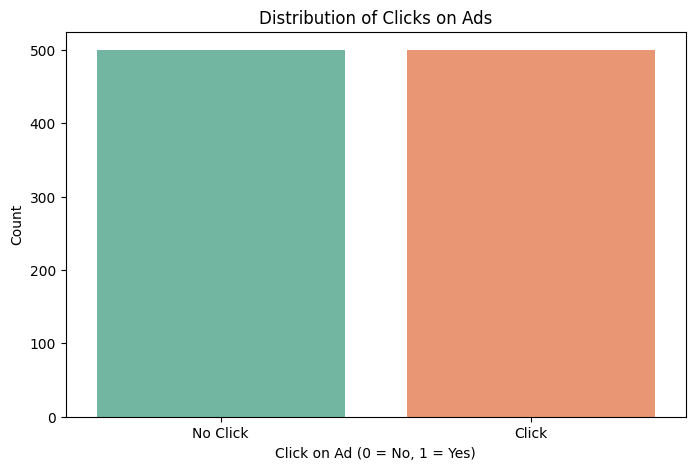

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Clicked on Ad', hue='Clicked on Ad', data=df, palette='Set2', legend=False)
plt.title('Distribution of Clicks on Ads')
plt.xlabel('Click on Ad (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Click', 'Click'])
plt.show()

👀 Tính giá trị tỷ lệ của cột

In [21]:
proportions = value_counts / len(df)
print("\nProportions of Each Class:")
print(proportions)


Proportions of Each Class:
Clicked on Ad
0    0.5
1    0.5
Name: count, dtype: float64


📈`NHẬN XÉT:`
- ***Sự phân chia gần như đồng đều*** này cho thấy ***không có sự mất cân bằng lớp*** đáng kể trong tập dữ liệu.
- Một phân bố cân bằng như vậy có lợi cho các việc phân loại, vì nó giúp đảm bảo mô hình dự đoán có thể học hiệu quả từ cả hai lớp mà không thiên vị lớp nào hơn.
- Chúng ta có thể kỳ vọng mô hình sẽ đáng tin cậy và công bằng hơn khi dự đoán sự tương tác của người dùng với quảng cáo.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:10px;padding-top:10px;font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">7.  Kiểm tra và biến đổi kiểu dữ liệu của các cột cho phù hợp nhu cầu sau này. 🧮
</div>

👀 Tiếp theo, chúng ta sẽ xem xét kiểu dữ liệu của từng cột và phân loại dữ liệu của các cột.

In [22]:
df.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

👀 Chúng ta có thể thấy rõ rằng kiểu dữ liệu của cột `Age` là **float64** nên chúng ta sẽ chuyển đổi nó thành **int64**.

In [23]:
df['Age'] = df['Age'].astype('int64')

👀 `Timestamp` có thể là kiểu dữ liệu date-time nên chúng ta chuyển đổi cột này thành **date-time**.

In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

👀 Bây giờ hãy cùng xem lại các kiểu dữ liệu của từng cột.

In [25]:
df.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object

👀 Tiếp theo, ta sẽ kiểm tra xem trong mỗi cột có bao nhiêu giá trị khác nhau.

In [26]:
unique_values = df.nunique()
print("Số giá trị khác nhau của mỗi cột:\n")
print(unique_values)

Số giá trị khác nhau của mỗi cột:

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                    997
Clicked on Ad                  2
dtype: int64


📈`NHẬN XÉT:`

- Ta có thể thấy, các cột Categorical Data như `Ad Topic Line`, `City`, `Country` có quá nhiều giá trị khác nhau trong mỗi cột.
- Với cột mỗi cột ta sẽ kiểm tra xem có thể áp dụng phương pháp Standardization nào hay không.

In [27]:
# Đếm số lượng xuất hiện (tính theo %) cùa mỗi giá trị trong cột Ad Topic Line
counts = df['Ad Topic Line'].value_counts(normalize=True)
print("Số lượng xuất hiện của mỗi giá trị trong cột Ad Topic Line:\n")
print(counts)

Số lượng xuất hiện của mỗi giá trị trong cột Ad Topic Line:

Ad Topic Line
Virtual 5thgeneration emulation                  0.001
Cloned 5thgeneration orchestration               0.001
Monitored national standardization               0.001
Organic bottom-line service-desk                 0.001
Triple-buffered reciprocal time-frame            0.001
                                                 ...  
Centralized content-based focus group            0.001
Team-oriented grid-enabled Local Area Network    0.001
Centralized neutral neural-net                   0.001
Mandatory homogeneous architecture               0.001
Configurable coherent function                   0.001
Name: proportion, Length: 1000, dtype: float64


In [28]:
# Đếm số lượng xuất hiện (tính theo %) cùa mỗi giá trị trong cột City
counts = df['City'].value_counts(normalize=True)
print("Số lượng xuất hiện của mỗi giá trị trong cột City:\n")
print(counts)

Số lượng xuất hiện của mỗi giá trị trong cột City:

City
Lisamouth        0.003
Williamsport     0.003
West Amanda      0.002
East Timothy     0.002
Lake Patrick     0.002
                 ...  
Nicholasland     0.001
Duffystad        0.001
New Darlene      0.001
South Jessica    0.001
Lake Matthew     0.001
Name: proportion, Length: 969, dtype: float64


In [29]:
# Đếm số lượng xuất hiện (tính theo %) cùa mỗi giá trị trong cột Country
counts = df['Country'].value_counts(normalize=True)
print("Số lượng xuất hiện của mỗi giá trị trong cột Country:\n")
print(counts)

Số lượng xuất hiện của mỗi giá trị trong cột Country:

Country
Czech Republic      0.009
France              0.009
Senegal             0.008
Peru                0.008
Greece              0.008
                    ...  
Kiribati            0.001
Marshall Islands    0.001
Bermuda             0.001
Mozambique          0.001
Lesotho             0.001
Name: proportion, Length: 237, dtype: float64


📈`NHẬN XÉT:`

Từ số liệu ở trên, ta có thể thấy không cột nào có dữ liệu có số lần xuất hiện vượt trội với các dữ liệu còn lại trong cột, tất cả các dữ liệu đều có số lần xuất hiện gần bằng nhau.

🔍 Nhìn tổng quan về tập dữ liệu, chúng ta không cần standardize bất kỳ cột dữ liệu nào nhưng có thể cần normalize một số cột dữ liệu số.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  8. Sắp xếp lại thứ tự của các cột trong bộ dữ liệu 🧮
</div> 

👀 Chúng ta hãy xem lại toàn bộ bộ dữ liệu.

In [30]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-10-01 02:31:00,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-03-06 03:36:00,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:00,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:00,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-07-03 01:40:00,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:00,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-11-07 01:42:00,0


📈`NHẬN XÉT:`

🌵 Chúng ta sẽ đem cột một số cột dữ liệu không phải kiểu số như `City` và `Country` ra đằng sau nhưng đứng trước `Clicked on Ad`, `Timestamp`.

🌵 Tiếp theo, chúng ta sẽ để cột `Daily Time Spent on Site`, `Daily Internet Usage` đứng trước 2 cột trên.

🌵 Cuối cùng, ta sẽ sắp xếp các cột dữ liệu còn lại theo thứ tự `Ad Topic Line`, `Area Income`, `Male` và `Age` ở phía trước.

In [31]:
df = df[['Ad Topic Line', 'Area Income', 'Male', 'Age', 'Daily Time Spent on Site', 'Daily Internet Usage', 'City', 'Country', 'Clicked on Ad', 'Timestamp']]
df.head(10)

,Ad Topic Line,Area Income,Male,Age,Daily Time Spent on Site,Daily Internet Usage,City,Country,Clicked on Ad,Timestamp
0,Cloned 5thgeneration orchestration,61833.90,0,35,68.95,256.09,Wrightburgh,Tunisia,0,2016-03-27 00:53:00
1,Monitored national standardization,68441.85,1,31,80.23,193.77,West Jodi,Nauru,0,2016-04-04 01:39:00
2,Organic bottom-line service-desk,59785.94,0,26,69.47,236.50,Davidton,San Marino,0,2016-03-13 20:35:00
3,Triple-buffered reciprocal time-frame,54806.18,1,29,74.15,245.89,West Terrifurt,Italy,0,2016-10-01 02:31:00
4,Robust logistical utilization,73889.99,0,35,68.37,225.58,South Manuel,Iceland,0,2016-03-06 03:36:00
5,Sharable client-driven software,59761.56,1,23,59.99,226.74,Jamieberg,Norway,0,2016-05-19 14:30:00
6,Enhanced dedicated support,53852.85,0,33,88.91,208.36,Brandonstad,Myanmar,0,2016-01-28 20:59:00
7,Reactive local challenge,24593.33,1,48,66.00,131.76,Port Jefferybury,Australia,1,2016-07-03 01:40:00
8,Configurable coherent function,68862.00,1,30,74.53,221.51,West Colin,Grenada,0,2016-04-18 09:33:00
9,Mandatory homogeneous architecture,55642.32,1,20,69.88,183.82,Ramirezton,Ghana,0,2016-11-07 01:42:00


📈`NHẬN XÉT:`

👀 Theo như mô tả dữ liệu, các giá trị `Daily Time Spent on Site` phải nhỏ hơn `Daily Internet Usage` trong mỗi dòng dữ liệu.

🔍 Bây giờ, chúng ta sẽ kiểm tra xem có dòng dữ liệu nào không hợp lý hay không.

In [32]:
invalid_rows = len(df[df['Daily Time Spent on Site'] < df['Daily Time Spent on Site']])
print('Số dòng dữ liệu không hợp lý: ', invalid_rows)

Số dòng dữ liệu không hợp lý:  0


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  9. Lưu lại bộ dữ đã được tiền xử lý 🧮
</div> 

In [33]:
df.dtypes

Ad Topic Line                       object
Area Income                        float64
Male                                 int64
Age                                  int64
Daily Time Spent on Site           float64
Daily Internet Usage               float64
City                                object
Country                             object
Clicked on Ad                        int64
Timestamp                   datetime64[ns]
dtype: object

In [34]:
df.to_csv('../../Data/2425_QC_cleaned.csv', index=False)